In [ ]:
# Uploading and Loading the Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

file_path = "Dosha_dataset.csv"
data = pd.read_csv(file_path)

print(data.info())
print(data.describe())
print(data.head())

Saving Dosha_dataset.csv to Dosha_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Columns: 135 entries, SampleIdx to class
dtypes: int64(1), object(134)
memory usage: 155.2+ KB
None
        SampleIdx
count  147.000000
mean    74.000000
std     42.579338
min      1.000000
25%     37.500000
50%     74.000000
75%    110.500000
max    147.000000
   SampleIdx Gender   bodyBuild_Size bodyFrame_Breadth bodyFrame_Length  \
0          1   Male  Weaklydeveloped       Thin/Narrow             Long   
1          2   Male    Welldeveloped             Broad             Long   
2          3   Male  Weaklydeveloped       Thin/Narrow             Long   
3          4   Male  Weaklydeveloped       Thin/Narrow             Long   
4          5   Male    Welldeveloped             Broad             Long   

  bodyHair_Color chest_Breadth   eye_Color             eye_Size  \
0          Black   Thin/Narrow   DarkBrown  Moderatelydeveloped   
1      DarkBrown         Broad   Da

In [20]:
# 1 - Data Cleaning

import pandas as pd

# Assuming `data` is already loaded as a DataFrame
print(f"Initial data shape: {data.shape}")

# 1.1 Handling Missing Values
# Drop rows and columns with all NaN values and fill missing categorical values with mode+
data_cleaned = data.fillna(data.mode().iloc[0])
print(f"Data shape after removing rows/columns with all NaN values: {data_cleaned.shape}")

# Resetting the index
data_cleaned = data_cleaned.reset_index(drop=True)

# 1.2 Removing Duplicates
print(f"Duplicates before: {data_cleaned.duplicated().sum()}")
data_cleaned = data_cleaned.drop_duplicates()
print(f"Duplicates after: {data_cleaned.duplicated().sum()}")
print(f"Data shape after duplicate removal: {data_cleaned.shape}")

# 1.3 Dropping Irrelevant Columns
columns_to_drop = ['SampleIdx']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')
print(f"Data shape after dropping irrelevant columns: {data_cleaned.shape}")


Initial data shape: (147, 135)
Data shape after removing rows/columns with all NaN values: (147, 135)
Duplicates before: 0
Duplicates after: 0
Data shape after duplicate removal: (147, 135)
Data shape after dropping irrelevant columns: (147, 134)


In [21]:
# 2 - Data Preprocessing

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 2.1 Identifying Categorical and Numerical Columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
print(f"Categorical columns: {list(categorical_columns)}")
print(f"Numerical columns: {list(numerical_columns)}")

# 2.2 Encoding Categorical Variables using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le
print(f"Data shape after encoding categorical variables: {data_cleaned.shape}")

# 2.3 Feature Scaling for Numerical Columns
if not numerical_columns.empty:
    scaler = MinMaxScaler()
    data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])
    print("Numerical columns scaled using MinMaxScaler.")

# 2.4 Separating Features and Target Variables
X = data_cleaned.iloc[:, :-1]  # last column is the target
y = data_cleaned.iloc[:, -1]
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Final row count
print(f"Total rows remaining after preprocessing: {data_cleaned.shape[0]}")

# Preview cleaned data
print("\nPreview of cleaned features (X):")
print(X.head())
print("\nPreview of target (y):")
print(y.head())


Categorical columns: ['Gender', 'bodyBuild_Size', 'bodyFrame_Breadth', 'bodyFrame_Length', 'bodyHair_Color', 'chest_Breadth', 'eye_Color', 'eye_Size', 'eye_Symmetry', 'eyebrow_Size', 'eyelash_Size', 'face_Size', 'forehead_Breadth', 'forehead_Length', 'hair_Growth', 'hair_Nature', 'hair_Type', 'hands_Length', 'joint_Size', 'leg_Length', 'lip_Size', 'lips_Color', 'nails_color', 'nails_Length', 'palate_Color', 'palms_Color', 'scalpHair_Color', 'shoulder_Breadth', 'skin_Color', 'skin_Nature', 'skin_Type', 'soles_Color', 'teeth_Color', 'teeth_Shape', 'teeth_Shape_Even', 'teeth_Size', 'appetite_Amount', 'appetite_Frequency', 'bladder_Amount', 'bladder_Frequency', 'body_Odour', 'bodytemp_Amount', 'bowel_Freq', 'bowel_Tendency', 'digestive_Amount', 'dreams_Amount', 'like_Astringent', 'like_Bitter', 'like_Pungent', 'like_Salty', 'like_Sour', 'like_Sweet', 'like_Warm', 'perspiration_Amount', 'sleep_Amount', 'sleep_Quality', 'stool_Consistency', 'suit_Oily', 'suit_Pungent', 'weight_Changes', 'eye

In [22]:
# 2.5 Display the mapping for each label encoded feature
for col, le in label_encoders.items():
    mapping = {category: code for code, category in enumerate(le.classes_)}
    print(f"{col} : {mapping}")


Gender : {'Female': 0, 'Male': 1}
bodyBuild_Size : {'Moderatelydeveloped': 0, 'Weaklydeveloped': 1, 'Welldeveloped': 2}
bodyFrame_Breadth : {'Broad': 0, 'Medium': 1, 'Thin/Narrow': 2}
bodyFrame_Length : {'Long': 0, 'Medium': 1, 'Tooshort/Toolong': 2}
bodyHair_Color : {'Black': 0, 'DarkBrown': 1, 'Dusky': 2, 'LightBrown': 3}
chest_Breadth : {'Broad': 0, 'Medium': 1, 'Thin/Narrow': 2}
eye_Color : {'Black': 0, 'DarkBrown': 1, 'Grayish': 2, 'LightBrown': 3}
eye_Size : {'Moderatelydeveloped': 0, 'Weaklydeveloped': 1, 'Welldeveloped': 2}
eye_Symmetry : {'Disproportionate': 0, 'Proportionate': 1}
eyebrow_Size : {'Large': 0, 'Medium': 1, 'Small': 2}
eyelash_Size : {'Large': 0, 'Medium': 1, 'Small': 2}
face_Size : {'Moderatelydeveloped': 0, 'Weaklydeveloped': 1, 'Welldeveloped': 2}
forehead_Breadth : {'Broad': 0, 'Medium': 1, 'Thin/Narrow': 2}
forehead_Length : {'Long': 0, 'Medium': 1, 'Tooshort/Toolong': 2}
hair_Growth : {'Dense': 0, 'Moderate': 1, 'Scanty': 2}
hair_Nature : {'Dry': 0, 'Normal

In [23]:
# 3 - Feature Selection

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# 3.1 Removing Low-Variance Features
# Create the selector to remove features with variance lower than 0.1
selector = VarianceThreshold(threshold=0.1)
# Fit the selector on X and transform X to retain only high-variance features
X_low_var = selector.fit_transform(X)
# Get the names of the features that were retained
selected_features = X.columns[selector.get_support()]
print(f"Shape after removing low-variance features: {X_low_var.shape}")

# Create a DataFrame from the selected features for further analysis
X_df = pd.DataFrame(X_low_var, columns=selected_features)

# 3.2 Correlation Matrix
# Calculate the absolute correlation matrix of the features
correlation_matrix = X_df.corr().abs()

# 3.3 Removing Highly Correlated Features
# Extract the upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Identify features with a correlation higher than 0.9 in the upper triangle
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
# Drop the highly correlated features from the DataFrame
X_no_corr = X_df.drop(columns=high_corr_features)
print(f"Shape after removing highly correlated features: {X_no_corr.shape}")

Shape after removing low-variance features: (147, 117)
Shape after removing highly correlated features: (147, 117)


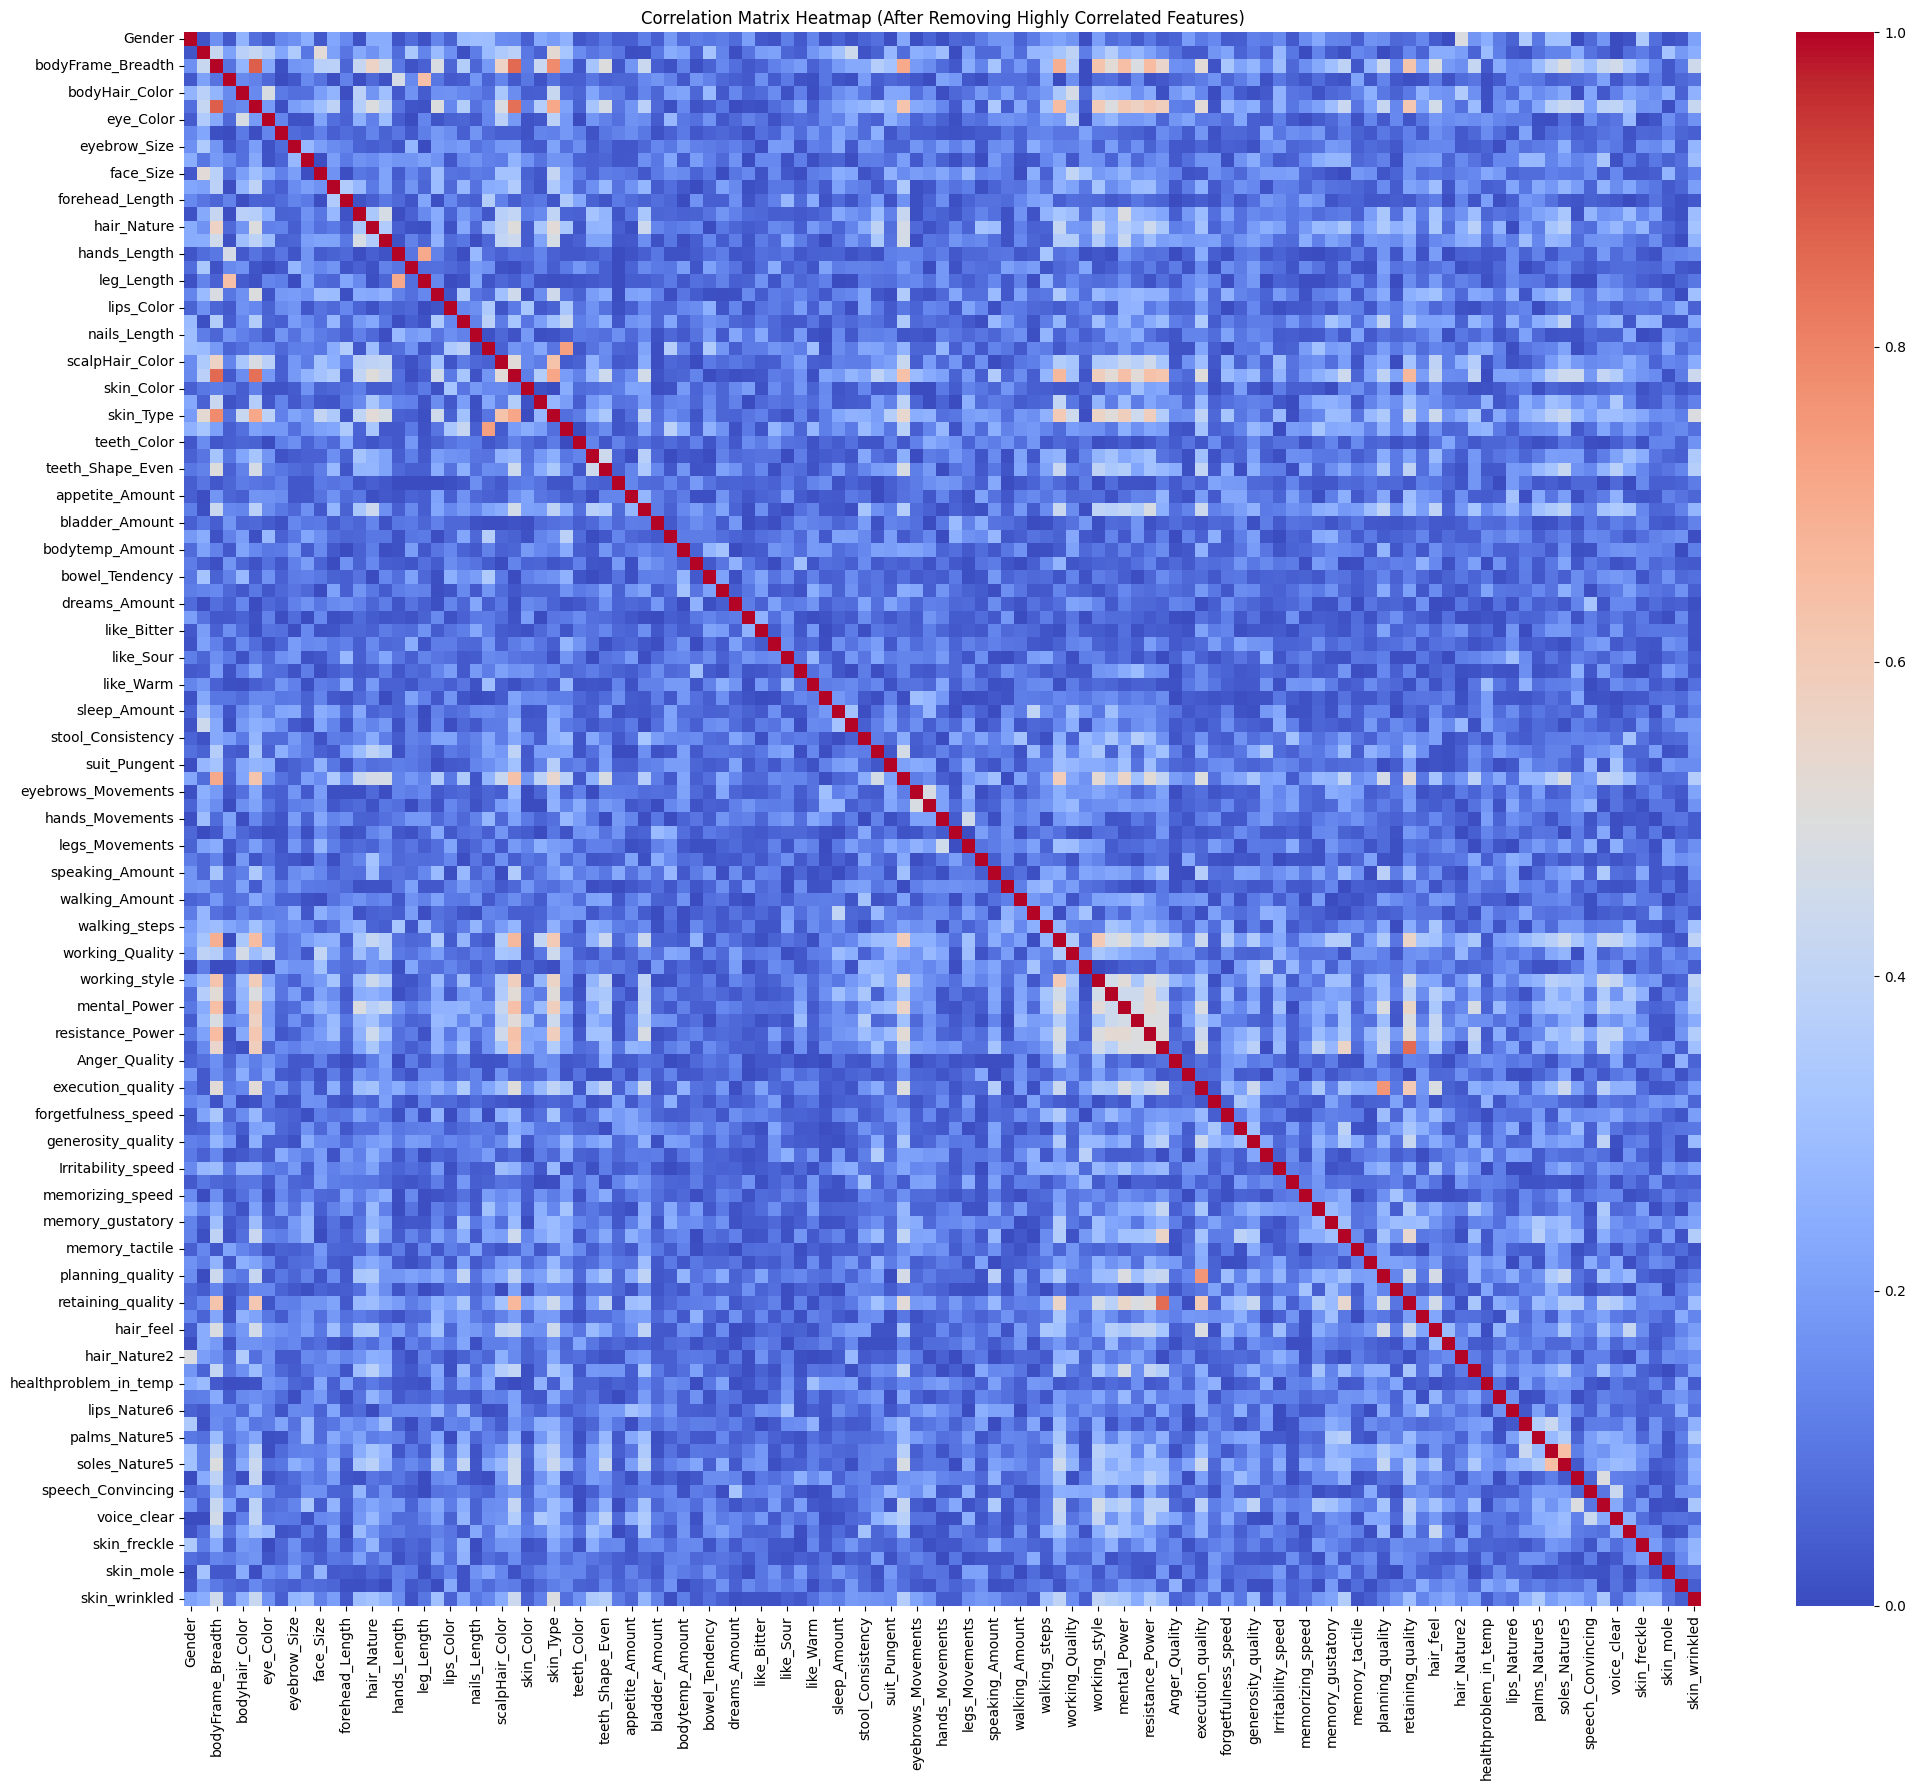

In [24]:
# 3.4 Plotting the heatmap for the updated correlation matrix after dropping correlated features
updated_correlation_matrix = X_no_corr.corr().abs()
plt.figure(figsize=(21, 18))
sns.heatmap(updated_correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap (After Removing Highly Correlated Features)")
plt.tight_layout()
plt.show()


Number of components to retain 90.0% variance: 49
Shape after PCA: (147, 49)


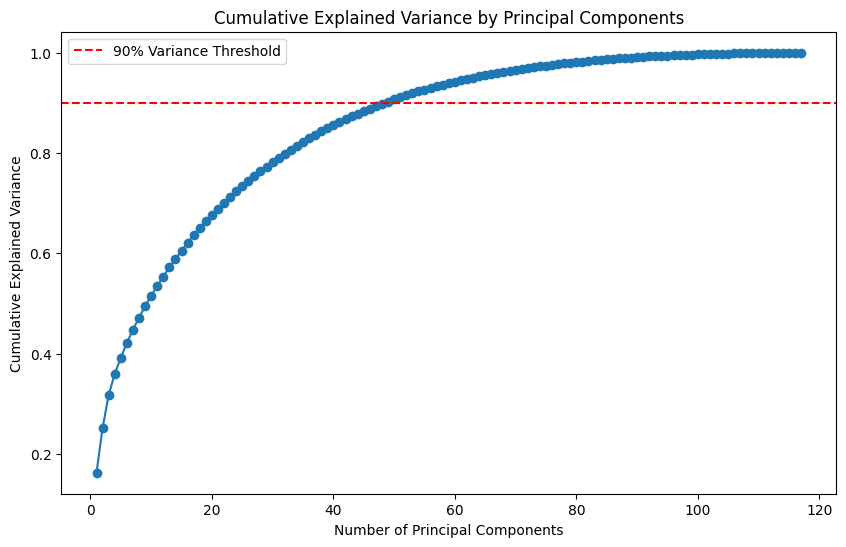

In [25]:
# 5 - PCA with Mean Imputation and Variance Thresholding: Selecting Components for 95% Explained Variance

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# 5.1 Impute missing values in X_no_corr (if any)
imputer = SimpleImputer(strategy='mean')
X_no_corr_imputed = imputer.fit_transform(X_no_corr)

# 5.2 Fit PCA on all components to determine explained variance ratios
pca_full = PCA()
pca_full.fit(X_no_corr_imputed)

# 5.3 Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 5.4 Set the threshold for cumulative explained variance (e.g., 95%)
threshold = 0.90
n_components_threshold = np.argmax(cumulative_variance >= threshold) + 1  # +1 because indices start at 0

print(f"Number of components to retain {threshold*100}% variance: {n_components_threshold}")

# Now apply PCA with the determined number of components
pca = PCA(n_components=n_components_threshold, random_state=42)
X_pca = pca.fit_transform(X_no_corr_imputed)
print(f"Shape after PCA: {X_pca.shape}")

# 5.5 Plot the cumulative explained variance (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{int(threshold*100)}% Variance Threshold')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()


In [26]:
import numpy as np
import pandas as pd

# pca.components_ has shape (n_components_threshold, n_features)
# Get the absolute loadings and weight them by each component's explained variance ratio
loadings = pca.components_  # shape: (n_components_threshold, n_features)
weighted_loadings = np.abs(loadings) * pca.explained_variance_ratio_.reshape(-1, 1)

# Sum the weighted loadings for each original feature (column) to get an importance score
feature_importance_pca = np.sum(weighted_loadings, axis=0)

# Create a DataFrame mapping original feature names (from X_no_corr) to their computed importance score
pca_importance_df = pd.DataFrame({
    'Feature': X_no_corr.columns,
    'PCA_Importance': feature_importance_pca
})

# Sort features by importance in descending order and select the top 20
top_features = pca_importance_df.sort_values(by='PCA_Importance', ascending=False).head(50)
print("Top original features based on PCA loadings:")
print(top_features)


Top original features based on PCA loadings:
                  Feature  PCA_Importance
26             skin_Color        0.150080
4          bodyHair_Color        0.142049
24        scalpHair_Color        0.123506
6               eye_Color        0.123368
55         weight_Changes        0.118574
23            palms_Color        0.111641
20             lips_Color        0.106138
29            soles_Color        0.097664
62        speaking_Amount        0.095273
84     Irritability_speed        0.093635
37             body_Odour        0.092415
27            skin_Nature        0.092359
41       digestive_Amount        0.088609
68        working_Quality        0.087894
64         walking_Amount        0.087703
21            nails_color        0.085866
10              face_Size        0.085773
80    forgetfulness_speed        0.085406
50           sleep_Amount        0.084010
1          bodyBuild_Size        0.082328
67          walking_style        0.081876
77            Anger_Speed      

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

# Use the best original feature names from the PCA loadings (e.g., top 20)
best_feature_names = top_features['Feature'].tolist()

# Filter the original dataset (X_no_corr) to only include these best features
X_best = X_no_corr[best_feature_names]

# Initialize and train the ExtraTreesClassifier on these features
model = ExtraTreesClassifier(random_state=42)
model.fit(X_best, y)

# Extract feature importances from the ExtraTreesClassifier
et_importances = model.feature_importances_

# Create a DataFrame mapping features to their importance scores from the classifier
et_importance_df = pd.DataFrame({
    'Feature': best_feature_names,
    'Importance': et_importances
})

# Sort and select the top 10 features based on ExtraTreesClassifier importance
top10_features = et_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 20 features after ExtraTreesClassifier:")
print(top10_features)


Top 20 features after ExtraTreesClassifier:
              Feature  Importance
32  bodyFrame_Breadth    0.165889
36   shoulder_Breadth    0.101847
37      chest_Breadth    0.095573
19     bodyBuild_Size    0.076870
4      weight_Changes    0.065810
20      walking_style    0.044083
13    working_Quality    0.036100
23      sleep_Quality    0.032084
28  retaining_quality    0.026766
35      working_style    0.022409


In [29]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Extract the top 10 feature names
top_feature_names = top10_features['Feature'].tolist()

# Select those columns from the original dataset
X_selected = X_no_corr[top_feature_names]

# Initialize and fit the scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

# Optional: Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=top_feature_names)

# Save the scaler for FastAPI use later
joblib.dump(scaler, 'scaler.pkl')
print(" Top 10 features scaled and scaler saved as 'scaler.pkl'")

# Save the fitted scaler to disk
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

 Top 10 features scaled and scaler saved as 'scaler.pkl'
Scaler saved as 'scaler.pkl'


In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib
from google.colab import files

print("Encoding top 10 features...")
X_encoded = X_no_corr[top_feature_names].copy()
label_encoders = {}

for col in top_feature_names:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le

# Save label encoders
joblib.dump(label_encoders, "label_encoders.pkl")
print("Saved label_encoders.pkl")
files.download("label_encoders.pkl")


print("Encoding target variable...")
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Save the target label encoder
joblib.dump(target_encoder, "label_encoder.pkl")
print("Saved label_encoder.pkl")
print("Target classes:", list(target_encoder.classes_))
files.download("label_encoder.pkl")

print("Scaling features with MinMaxScaler...")
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")
files.download("scaler.pkl")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")


Encoding top 10 features...
Saved label_encoders.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Encoding target variable...
Saved label_encoder.pkl
Target classes: [np.int64(0), np.int64(1), np.int64(2)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scaling features with MinMaxScaler...
Scaler saved as 'scaler.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training shape: (117, 10), Testing shape: (30, 10)



K-Nearest Neighbors Results:
Training Accuracy: 0.9573
Testing Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.56      0.83      0.67         6
           2       1.00      0.67      0.80        12

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.81        30
weighted avg       0.88      0.83      0.84        30

Training Log Loss: 0.1030
Model saved as 'k-nearest_neighbors_model.pkl'


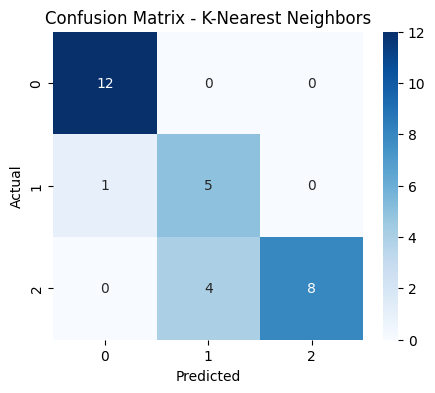

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Random Forest Results:
Training Accuracy: 0.9915
Testing Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.60      1.00      0.75         6
           2       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.85        30
weighted avg       0.92      0.87      0.87        30

Training Log Loss: 0.0530
Model saved as 'random_forest_model.pkl'


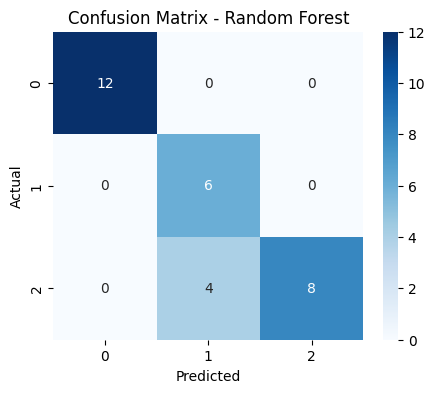

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Logistic Regression Results:
Training Accuracy: 0.9658
Testing Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      1.00      0.80         6
           2       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

Training Log Loss: 0.1668
Model saved as 'logistic_regression_model.pkl'


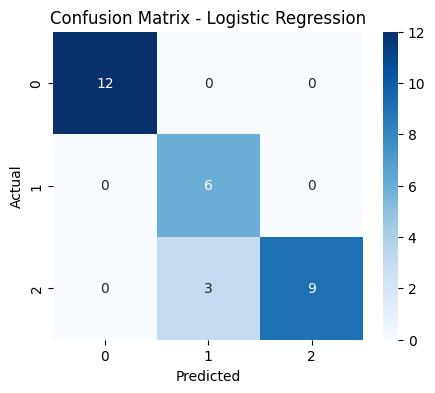

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Support Vector Machine Results:
Training Accuracy: 0.9658
Testing Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      1.00      0.80         6
           2       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

Training Log Loss: 0.1448
Model saved as 'support_vector_machine_model.pkl'


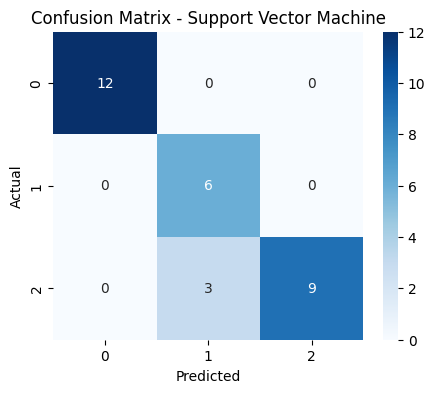

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Gradient Boosting Results:
Training Accuracy: 0.9915
Testing Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.60      1.00      0.75         6
           2       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.85        30
weighted avg       0.92      0.87      0.87        30

Training Log Loss: 0.0152
Model saved as 'gradient_boosting_model.pkl'


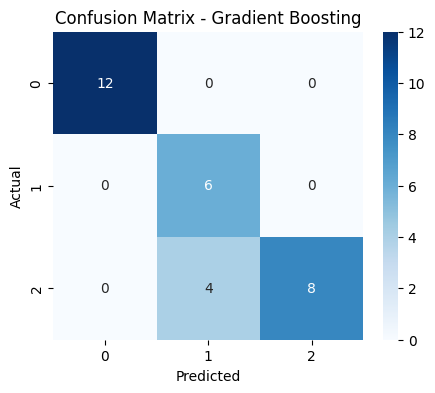

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from google.colab import files  # Optional for Colab

# Split your scaled features and encoded target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define all models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}



# Loop through and evaluate each model
for model_name, model in models.items():
    print(f"\n{model_name} Results:")
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Train Loss
    try:
        y_train_proba = model.predict_proba(X_train)
        loss = log_loss(y_train, y_train_proba)
        print(f"Training Log Loss: {loss:.4f}")
    except AttributeError:
        print("Training Log Loss: Not supported for this model")

    # Save each model
    model_filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_filename)
    print(f"Model saved as '{model_filename}'")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    files.download("logistic_regression_model.pkl")


In [34]:
from sklearn.metrics import log_loss

# Dictionary of model names and their corresponding objects (already trained)
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train all models (assumes X_scaled and y_encoded already defined)
for model_name, model in models.items():
    model.fit(X_scaled, y_encoded)

    try:
        y_proba = model.predict_proba(X_scaled)
        loss = log_loss(y_encoded, y_proba)
        print(f"{model_name} - Training Log Loss: {loss:.4f}")
    except AttributeError:
        print(f"{model_name} - Training Log Loss: Not supported")


K-Nearest Neighbors - Training Log Loss: 0.1203
Random Forest - Training Log Loss: 0.0550
Logistic Regression - Training Log Loss: 0.1800
Support Vector Machine - Training Log Loss: 0.1557
Gradient Boosting - Training Log Loss: 0.0209
